In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [3]:
nike = pd.read_csv('../datasets/nike.csv')
adidas = pd.read_csv('../datasets/adidas.csv')

# Data Cleaning

## Nike
### Null values

In [4]:
nike[nike.selftext.isnull()==True]

,author,subreddit,selftext,title,created_utc
1,Alone_Painter_7326,Nike,NaN,Our local courier here in the Philippines lost...,1668060481
2,CumMilkshake69,Nike,NaN,What jacket is this? I know this is vintage an...,1668048611
6,SpecialJellyfish3331,Nike,NaN,what nike pants ar those what is the name of t...,1668007054
7,mikako_Kiyoko,Nike,NaN,can someone explain why my uv shoes stop worki...,1668006698
10,jpsmoothh,Nike,NaN,"very clean concept, meaning, and details but v...",1668001699
...,...,...,...,...,...
4992,_bono983,Nike,NaN,New slogan: Come Run With Us. Do you like it b...,1667193198
4993,Foreign_Rent_2411,Nike,NaN,"Nike poster I made a while back , if you like ...",1667176551
4995,TONYFAWNTANAA,Nike,NaN,"Hello everyone, cam you please subscribe to my...",1667170337
4997,KanniPro,Nike,NaN,Please give suggestions :) I know nothing abou...,1667140982


In [5]:
nike['selftext'] = nike['selftext'].fillna('')

In [6]:
nike['text'] = nike['title'] + ' ' + nike['selftext']

### Removing Links

In [7]:
def check_char(char_name, char, data):
    count = 0
    for text in data['text']:
        count += text.count(char)
    return print(f'{char_name}: {count}')

In [8]:
check_char('links', 'http', nike)

links: 494


In [9]:
nike['text'] = nike['text'].str.replace('http\S+|www.\S+', '', case=False)

### Removing Characters

In [10]:
check_char('newline', '\n', nike)

newline: 2653


In [11]:
check_char('backslash', '\\', nike)

backslash: 2


In [12]:
check_char('dspace', '  ', nike)

dspace: 232


In [13]:
check_char('dquote', '\"', nike)

dquote: 9


In [14]:
def replace_char(char_name, char, data):
    for text in data['text']:
        data['text'] = data['text'].str.replace(char,' ').replace('  ',' ')
    return check_char(char_name, char, data)

In [15]:
replace_char('newline', '\n', nike)

newline: 0


In [16]:
replace_char('backslash', '\\', nike)

backslash: 0


In [17]:
replace_char('dquote', '\"', nike)

dquote: 0


### Final Word Count

In [18]:
nike['word_count'] = nike['text'].map(lambda x: len(x.split()))

In [19]:
nike['word_count'].sort_values(ascending = True)

47       20
49       20
27       20
18       20
3229     21
       ... 
108     311
2358    311
4458    311
1758    311
46      347
Name: word_count, Length: 5000, dtype: int64

In [20]:
nike.head()

,author,subreddit,selftext,title,created_utc,text,word_count
0,yeet_zeehond,Nike,Im trying to login with paypal on nike snkrs b...,nike snkrs paypal error,1668065959,nike snkrs paypal error Im trying to login wit...,35
1,Alone_Painter_7326,Nike,,Our local courier here in the Philippines lost...,1668060481,Our local courier here in the Philippines lost...,57
2,CumMilkshake69,Nike,,What jacket is this? I know this is vintage an...,1668048611,What jacket is this? I know this is vintage an...,21
3,Rudy5860,Nike,So I’m just getting into sneakers and have bou...,Burned on the dunk drop today.,1668036353,Burned on the dunk drop today. So I’m just get...,140
4,ness-main,Nike,I got a pair of air forces that I wear almost ...,Is there anyway to restore the grip on a pair ...,1668029200,Is there anyway to restore the grip on a pair ...,58


## Adidas
### Null values

In [21]:
adidas['selftext'] = adidas['selftext'].fillna('')

In [22]:
adidas['text'] = adidas['title'] + ' ' + adidas['selftext']

In [23]:
check_char('http', 'http', adidas)

http: 687


### Removing Links

In [24]:
adidas['text'] = adidas['text'].str.replace('http\S+|www.\S+', '', case=False)

In [25]:
check_char('newline', '\n', adidas)

newline: 7560


In [26]:
check_char('backslash', '\\', adidas)

backslash: 228


In [27]:
check_char('dspace', '  ', adidas)

dspace: 1244


In [28]:
check_char('dquote', '\"', adidas)

dquote: 509


In [29]:
replace_char('newline', '\n', adidas)

newline: 0


In [30]:
replace_char('backslash', '\\', adidas)

backslash: 0


In [31]:
replace_char('dquote', '\"', adidas)

dquote: 0


### Final Word Count

In [32]:
adidas['word_count'] = adidas['text'].map(lambda x: len(x.split()))

In [33]:
adidas['word_count'].sort_values(ascending = True)

118      20
4174     20
1534     20
4614     20
1350     20
       ... 
528     304
2992    304
4928    304
1848    304
1232    304
Name: word_count, Length: 5000, dtype: int64

In [34]:
adidas.head()

,author,subreddit,selftext,title,created_utc,text,word_count
0,KiryuuShino,adidas,Hey ive been wondering if the NMD v3 is tts? F...,Adidas NMD V3 sizing. Is it TTS (True to size) ?,1668067730,Adidas NMD V3 sizing. Is it TTS (True to size)...,66
1,kurokageidris,adidas,,I was wondering if you can use this Adidas Str...,1668053913,I was wondering if you can use this Adidas Str...,22
2,ten-lbs-over,adidas,,Anyone know what shoes these are? Worn by Evan...,1668053651,Anyone know what shoes these are? Worn by Evan...,30
3,UltramanTiga_52,adidas,My TTS is US9 (27cm). Narrow feet\n\nWhat size...,Adilette 22 sizing,1668048085,Adilette 22 sizing My TTS is US9 (27cm). Narro...,36
4,Jpdelgado,adidas,It’s been crazy to get a simple answer from th...,Custom Gear (Adiclub),1668040604,Custom Gear (Adiclub) It’s been crazy to get a...,51


# EDA

## Overview Dataset Analysis

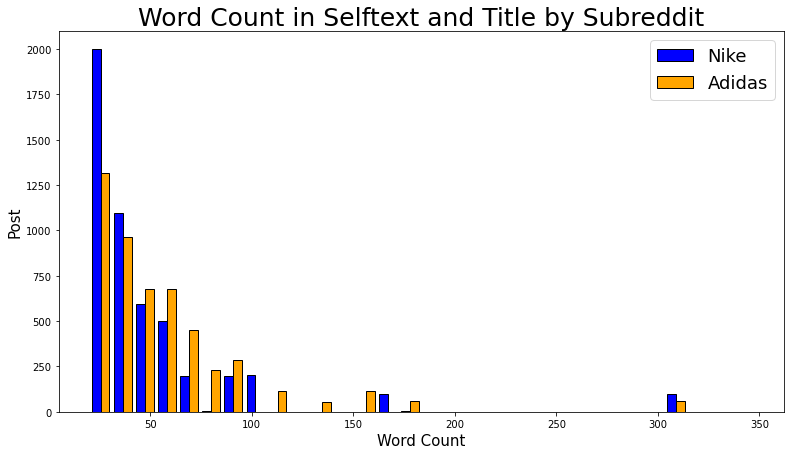

In [42]:
plt.figure(figsize=(13,7))
plt.hist([nike['word_count'], 
          adidas['word_count']],
         bins=30, color=['blue', 'orange'], ec='k')

plt.title('Word Count in Selftext and Title by Subreddit', fontsize=25)
plt.legend(['Nike', 'Adidas'], fontsize=18);
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Post", fontsize=15)
plt.savefig('../chart/word_count.png', bbox_inches='tight')

In [44]:
nike['author'].value_counts()

Extroe                 394
Nervous-Matter4576     198
Syranial-Bean          198
NesquikBoi              99
lsweg                   99
                      ... 
WarAsleep                1
potatoman1036            1
runsdead67               1
BearPrestigious7101      1
anonwantstobemore        1
Name: author, Length: 108, dtype: int64

In [45]:
adidas['author'].value_counts()

neonnearvash            167
Alternative_Coconut6    111
MClooosey               110
manybutters              57
kgoverlbs180190          57
                       ... 
HairyMamba96              1
Elkaram77                 1
IamAsleepNowCallL8r       1
Size4E                    1
KiryuuShino               1
Name: author, Length: 128, dtype: int64

## Words Analysis
### 20 Most Common Words

#### Nike

In [46]:
cv = CountVectorizer(stop_words='english')
cv.fit(nike['text'])

nike_cv = cv.transform(nike['text'])
nike_cv_df = pd.DataFrame(nike_cv.todense(), columns=cv.get_feature_names())

In [47]:
nike_cv_df = nike_cv_df.drop('nike', axis=1)

In [48]:
nike_top_words = pd.DataFrame(nike_cv_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
nike_top_words.T

,shoes,like,know,just,size,help,little,pair,air,bought,really,make,leather,work,ve,does,time,don,reflective,worn
Count,3193,1692,1602,1601,1308,995,791,710,708,702,701,695,694,692,605,600,599,597,592,499


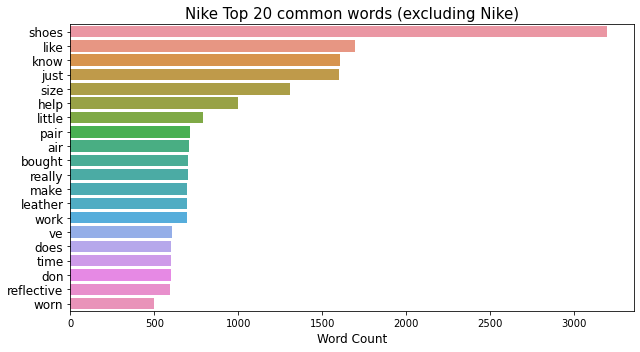

In [49]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x='Count', y=nike_top_words.index , data=nike_top_words)
plt.title('Nike Top 20 common words (excluding Nike)',fontsize=15)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../chart/nike_20words.png', bbox_inches='tight')

#### Adidas

In [50]:
cv.fit(adidas['text'])

adidas_cv = cv.transform(adidas['text'])
adidas_cv_df = pd.DataFrame(adidas_cv.todense(), columns=cv.get_feature_names())

In [51]:
adidas_cv_df = adidas_cv_df.drop('adidas', axis=1)

In [52]:
adidas_top_words = pd.DataFrame(adidas_cv_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
adidas_top_words.T

,pair,shoes,know,shoe,just,ve,help,size,got,like,don,does,buy,need,black,confirmed,app,want,time,order
Count,1762,1375,1364,1311,1307,1018,908,819,792,749,732,683,681,622,621,619,616,614,564,509


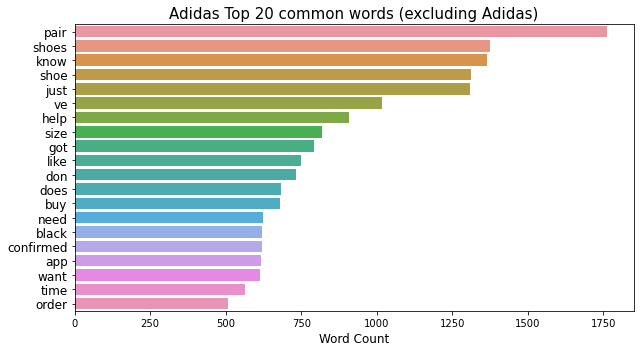

In [53]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x='Count', y=adidas_top_words.index , data=adidas_top_words)
plt.title('Adidas Top 20 common words (excluding Adidas)',fontsize=15)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../chart/adidas_20words.png', bbox_inches='tight')

#### Both

In [55]:
both = []
for i in range(20):
    for j in range(20):
        if nike_top_words.index[i] == adidas_top_words.index[j]:
            both.append(nike_top_words.index[i])
print(both)

['shoes', 'like', 'know', 'just', 'size', 'help', 'pair', 've', 'does', 'time', 'don']


In [56]:
nike_words = list(nike_top_words.index)
nike_words = [x for x in nike_words if x not in both]
print(nike_words)

['little', 'air', 'bought', 'really', 'make', 'leather', 'work', 'reflective', 'worn']


In [57]:
adidas_words = list(adidas_top_words.index)
adidas_words = [x for x in adidas_words if x not in both]
print(adidas_words)

['shoe', 'got', 'buy', 'need', 'black', 'confirmed', 'app', 'want', 'order']


There are 11 common word from both Nike and Adidas, which is expected as both brands' businesses are driven by Footwear. Some words that stand out from Nike only are 'air', 'leather', 'work' and 'reflective', while for Adidas only are 'black', 'confirmed' and 'app'. We will move on to Bigram to further analyse more commonly used words in each subreddit.

### 20 Most Common Bigram

#### Nike

In [58]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(nike['text'])

nike_bigrams_cv = cv_bigrams.transform(nike['text'])
nike_bigrams_df = pd.DataFrame(nike_bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

In [59]:
nike_top_bi = pd.DataFrame(nike_bigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
nike_top_bi

,Count
air max,398
nike shoes,299
does know,298
amp x200b,297
basketball shoes,297
photon dust,295
lace loops,295
reflective lace,295
loops 95s,295
dust reflective,295


#### Adidas

In [60]:
cv_bigrams.fit(adidas['text'])

adidas_bigrams_cv = cv_bigrams.transform(adidas['text'])
adidas_bigrams_df = pd.DataFrame(adidas_bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

In [61]:
adidas_top_bi = pd.DataFrame(adidas_bigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
adidas_top_bi

,Count
does know,285
need help,230
pair adidas,227
pair shoes,227
kanye west,226
adidas confirmed,226
adidas app,225
confirmed app,224
adidas shoes,171
store pickup,171


In [62]:
both_bigram = []
for i in range(20):
    for j in range(20):
        if nike_top_bi.index[i] == adidas_top_bi.index[j]:
            both_bigram.append(nike_top_bi.index[i])
print(both_bigram)

['does know']


We can identify a few words that are related to each brand.

**Nike**
- Style Names/Colourway: 'air max'/'airmax 95', 'air force', 'jordan 1s', 'photon dust'
- Product/Features: 'basketball shoes', 'lace loops', 'flex experience', 'reflective lace'

**Adidas**
- Style Names/Association: 'nmd r1', 'shoes boost', 'kanye west'
- Product/Features: 'track jacket', 'boost sole'
- UX/Service: 'confirmed app', 'store pickup', 'adidas website'


### 20 Most Common Trigram

#### Nike

In [63]:
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(nike['text'])

nike_bigrams_cv = cv_trigrams.transform(nike['text'])
nike_trigrams_df = pd.DataFrame(nike_bigrams_cv.todense(), columns=cv_trigrams.get_feature_names())

In [64]:
nike_top_tri = pd.DataFrame(nike_trigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
nike_top_tri

,Count
reflective lace loops,295
lace loops 95s,295
photon dust reflective,295
guys date tag,198
air max 95,198
air max plus,198
date tag tell,198
hey guys date,198
tag tell legit,198
tell legit thank,198


#### Adidas

In [65]:
cv_trigrams.fit(adidas['text'])

adidas_bigrams_cv = cv_trigrams.transform(adidas['text'])
adidas_trigrams_df = pd.DataFrame(adidas_bigrams_cv.todense(), columns=cv_trigrams.get_feature_names())

In [66]:
adidas_top_tri = pd.DataFrame(adidas_trigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
adidas_top_tri

,Count
bought adicolor classics,114
classics primeblue sst,114
adicolor classics primeblue,114
primeblue sst track,114
sure age like,113
mean know look,113
comfy sure age,113
need sizing help,113
term usage reviews,113
boosts durable mean,113


Now we can see the combined word make more sense and more distinctive.

**Nike**
- Style Names/Colourway: 'photon dust reflective', 'air max 95', 'air max plus', 'colour photon dust', 'bought jordan 1s', 'air force 1s', 'mens dunks time'
- Product/Features: 'reflective lace loops', 'lace loops 95s' 

**Adidas**
- Style Names/Colourway: 'bought adicolor classics', 'classics primeblue sst', 'adicolor classics primeblue', 'primeblue sst track', '22 boosts durable', 'zx 22 boosts'
- Product/Features: 'comfy sure age', 'like long term', 'boosts durable mean'
- Association: 'cut ties kanye', 'ties kanye west', 'adidas website'

### 20 Most Common Words using TF-IDF

#### Nike

In [67]:
tfidf = TfidfVectorizer(stop_words='english')#, min_df=3, max_df=1.0)

nike_tfidf = tfidf.fit_transform(nike['text'])
nike_tfidf_df = pd.DataFrame(nike_tfidf.toarray(), columns=tfidf.get_feature_names())

In [68]:
nike_tfidf_df.shape

(5000, 1165)

In [69]:
nike_tfidf_col = {col: [nike_tfidf_df[col].max(), 
                        nike_tfidf_df[col].mean(),
                        nike_tfidf_df[col].sum()] for col in nike_tfidf_df.columns}

nike_tfidf_col_df = pd.DataFrame(nike_tfidf_col, index = ['max','mean','sum']).T

In [70]:
nike_tfidf_col_df.sort_values(by = ['max','sum'], ascending = False).head(20)


,max,mean,sum
bottoms,0.751458,0.000193,0.966005
label,0.689760,0.000138,0.689760
grip,0.674640,0.000135,0.674640
sc,0.652106,0.000130,0.652106
cool,0.647814,0.000130,0.647814
bag,0.631582,0.000126,0.631582
pants,0.629302,0.000298,1.489936
customize,0.620546,0.000124,0.620546
notifications,0.613902,0.000123,0.613902
stains,0.596438,0.011809,59.047333


#### Adidas

In [71]:
adidas_tfidf = tfidf.fit_transform(adidas['text'])
adidas_tfidf_df = pd.DataFrame(adidas_tfidf.toarray(), columns=tfidf.get_feature_names())

In [72]:
adidas_tfidf_df.shape

(5000, 1377)

In [73]:
adidas_tfidf_col = {col: [adidas_tfidf_df[col].max(), 
                          adidas_tfidf_df[col].mean(),
                          adidas_tfidf_df[col].sum()] for col in adidas_tfidf_df.columns}

adidas_tfidf_col_df = pd.DataFrame(adidas_tfidf_col, index = ['max','mean','sum']).T

In [74]:
adidas_tfidf_col_df.sort_values(by = ['max','sum'], ascending = False).head(20)


,max,mean,sum
shirt,0.751104,0.000178,0.891643
hoodie,0.747451,0.008222,41.109790
0s,0.734732,0.002495,12.475973
4d,0.688850,0.007577,37.886767
woman,0.674465,0.000135,0.674465
waterproof,0.672673,0.000135,0.672673
ups,0.667378,0.007475,37.373193
grow,0.638540,0.007279,36.396757
difference,0.629057,0.014936,74.679806
purple,0.628461,0.007164,35.822270


Using TF-IDF to find common words, we notice that the words are less distinctive to individual brand.

### Sentiment Analysis

In [75]:
sent = SentimentIntensityAnalyzer()
nike_sent = [sent.polarity_scores(i) for i in nike.text]
adidas_sent = [sent.polarity_scores(i) for i in adidas.text]

In [76]:
nike_sent_df = pd.DataFrame(nike_sent)
nike_sent_df.head()

,neg,neu,pos,compound
0,0.058,0.942,0.000,-0.2144
1,0.118,0.882,0.000,-0.6908
2,0.000,0.912,0.088,0.1655
3,0.048,0.849,0.103,0.8374
4,0.000,0.913,0.087,0.5803


In [77]:
adidas_sent_df = pd.DataFrame(adidas_sent)
adidas_sent_df.head()

,neg,neu,pos,compound
0,0.000,0.908,0.092,0.6747
1,0.000,1.000,0.000,0.0000
2,0.140,0.860,0.000,-0.5267
3,0.000,0.916,0.084,0.4329
4,0.048,0.929,0.022,-0.3182


In [78]:
def senti_rank(data):
    data['rank'] = 'neu'
    for index, row in enumerate(data['compound']):
        if row <= -0.05:
            data['rank'][index] = 'neg'
        elif row >= 0.05:
            data['rank'][index] = 'pos'     
    return data.head()

In [79]:
senti_rank(nike_sent_df)

,neg,neu,pos,compound,rank
0,0.058,0.942,0.000,-0.2144,neg
1,0.118,0.882,0.000,-0.6908,neg
2,0.000,0.912,0.088,0.1655,pos
3,0.048,0.849,0.103,0.8374,pos
4,0.000,0.913,0.087,0.5803,pos


In [80]:
senti_rank(adidas_sent_df)

,neg,neu,pos,compound,rank
0,0.000,0.908,0.092,0.6747,pos
1,0.000,1.000,0.000,0.0000,neu
2,0.140,0.860,0.000,-0.5267,neg
3,0.000,0.916,0.084,0.4329,pos
4,0.048,0.929,0.022,-0.3182,neg


In [81]:
nike_sent_df.groupby('rank').mean()

,neg,neu,pos,compound
rank,,,,
neg,0.130492,0.836601,0.032776,-0.509627
neu,0.000347,0.999237,0.000416,-0.000028
pos,0.030890,0.803673,0.165343,0.580226


In [82]:
adidas_sent_df.groupby('rank').mean()

,neg,neu,pos,compound
rank,,,,
neg,0.119250,0.849780,0.031068,-0.491222
neu,0.000000,1.000000,0.000000,0.000000
pos,0.024993,0.838827,0.136215,0.583177


In [83]:
nike_sent_df['rank'].value_counts()*100/len(nike_sent_df)

pos    62.18
neg    29.80
neu     8.02
Name: rank, dtype: float64

In [84]:
adidas_sent_df['rank'].value_counts()*100/len(adidas_sent_df)

pos    64.76
neg    22.84
neu    12.40
Name: rank, dtype: float64

From the graph below we can see how the Sentiment score is distributed between the two subreddit Nike and Adidas. We will compare between the warious mertics: 'compound', 'neg', 'neu' and 'pos'

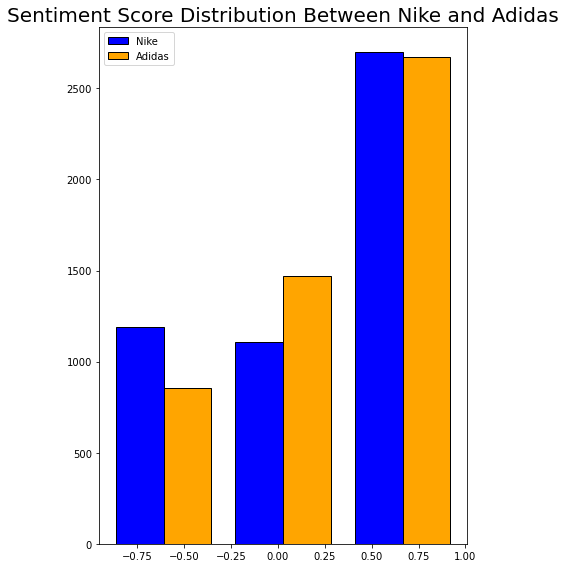

In [110]:
# fig, ax = plt.subplots(figsize=(9,5))
# sns.barplot(x='Count', y=rank.index , data=nike_top_words)

plt.figure(figsize=(6,8))
plt.hist([nike_sent_df['compound'], adidas_sent_df['compound']],
         bins=3, color=['blue', 'orange'], ec='k')

plt.title('Sentiment Score Distribution Between Nike and Adidas', fontsize=20)
plt.legend(['Nike', 'Adidas'])
plt.tight_layout()
plt.savefig('../chart/nike_adidas_senti.png', bbox_inches='tight')

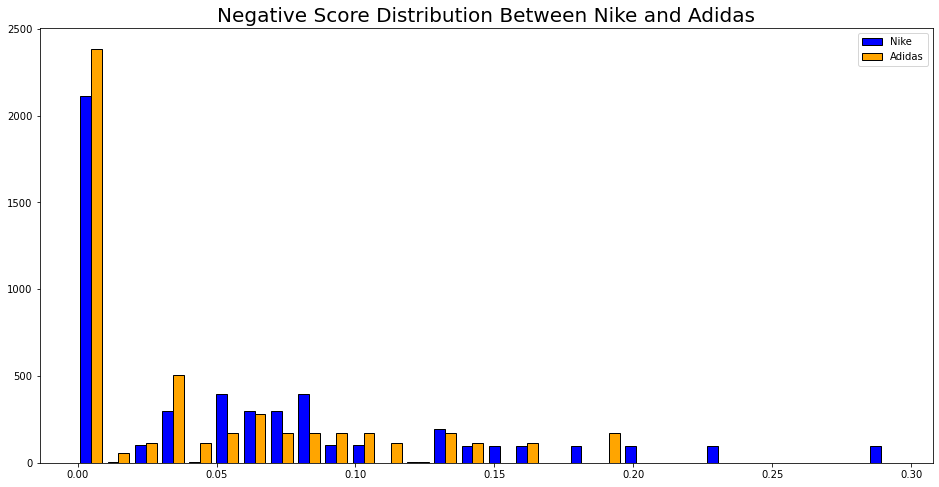

In [76]:
plt.figure(figsize=(16,8))
plt.hist([nike_sent_df['neg'], 
          adidas_sent_df['neg']],
         bins=30, color=['blue', 'orange'], ec='k')

plt.title('Negative Score Distribution Between Nike and Adidas', fontsize=20)
plt.legend(['Nike', 'Adidas']);

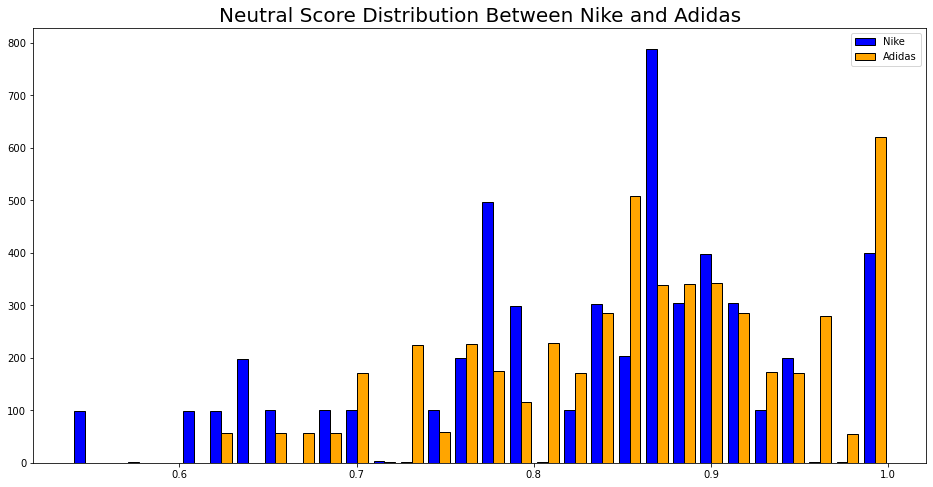

In [77]:
plt.figure(figsize=(16,8))
plt.hist([nike_sent_df['neu'], 
          adidas_sent_df['neu']],
         bins=30, color=['blue', 'orange'], ec='k')

plt.title('Neutral Score Distribution Between Nike and Adidas', fontsize=20)
plt.legend(['Nike', 'Adidas']);

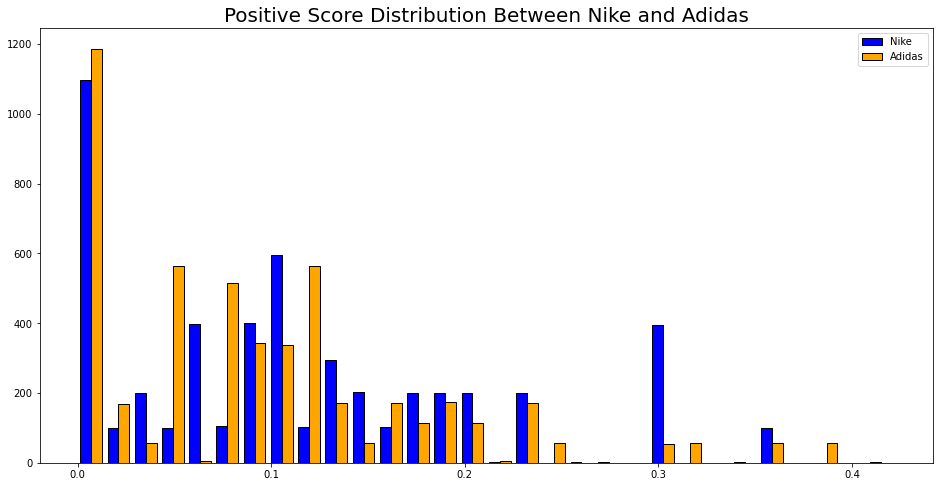

In [78]:
plt.figure(figsize=(16,8))
plt.hist([nike_sent_df['pos'], 
          adidas_sent_df['pos']],
         bins=30, color=['blue', 'orange'], ec='k')

plt.title('Positive Score Distribution Between Nike and Adidas', fontsize=20)
plt.legend(['Nike', 'Adidas']);

Overall scoring on 'compound' shows that Adidas is have more positive posts than Nike, however they also have more negative posts. If we were to combine neutral and positive posts to compare, that will mean that the community using Nike subreddit are posting more positive comments or neutral questions, while Adidas subreddit probably have more user review about their web or app issue and service, which result in higher negative score.

# Saving Data

In [79]:
reddit_nlp = pd.concat([nike,adidas], axis=0)

In [80]:
reddit_nlp = reddit_nlp[['subreddit','text']]

In [81]:
reddit_nlp['subreddit'] = reddit_nlp['subreddit'].map({'adidas': 0, 'Nike': 1})

In [82]:
reddit_nlp

,subreddit,text
0,1,nike snkrs paypal error Im trying to login wit...
1,1,Our local courier here in the Philippines lost...
2,1,What jacket is this? I know this is vintage an...
3,1,Burned on the dunk drop today. So I’m just get...
4,1,Is there anyway to restore the grip on a pair ...
...,...,...
4995,0,Ultraboost 22 vs 4DFWD2? Just what the title s...
4996,0,No order confirmation So yesterday I won the y...
4997,0,Im thinking about buying the firebird primeblu...
4998,0,Adidas 4DFWD Long term review needed I’m think...


In [83]:
reddit_nlp = reddit_nlp.reset_index(drop=True)

In [84]:
nike.to_csv('../datasets/nike_clean.csv', index=False)

In [85]:
adidas.to_csv('../datasets/adidas_clean.csv', index=False)

In [86]:
reddit_nlp.to_csv('../datasets/nike_adidas.csv', index=False)